In [2]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, spearmanr

import matplotlib.pyplot as plt

In [21]:
dhs  = pd.read_table('DNASE_region_forSager.wig', sep='\t', skiprows=1, header=None, names=['chrom', 'start', 'end', 'score'])

In [4]:
data = pd.read_table('MPRA_LocusSelect_pred_v1.txt', sep=' ')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3364: DtypeWarning: Columns (2,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [5]:
data.columns

Index(['ID', 'SNP', 'chr', 'snp_pos', 'ref_allele', 'alt_allele', 'allele',
       'window', 'strand', 'start', 'stop', 'project', 'haplotype',
       'Ctrl.Mean', 'Exp.Mean', 'K562_mean', 'lfcSE', 'stat', 'pvalue', 'padj',
       'nt_sequence', 'K562_pred', 'HepG2_pred', 'SKNSH_pred', 'K562_pred_rc',
       'HepG2_pred_rc', 'SKNSH_pred_rc', 'K562_pred_aggreg',
       'HepG2_pred_aggreg', 'SKNSH_pred_aggreg'],
      dtype='object')

In [6]:
data.loc[ data[ 'project' ] == 'Tiles-GATA', ['start','K562_mean','K562_pred_aggreg'] ]

,start,K562_mean,K562_pred_aggreg
44944,47785501.0,0.872933,0.617789
44945,47785551.0,0.334135,0.354716
44946,47785601.0,0.185422,-0.002717
44947,47785651.0,0.969526,0.970611
44948,47785701.0,-0.174891,-0.247688
...,...,...,...
99142,49880251.0,-0.377153,-0.272555
99143,49880301.0,-0.156079,-0.133179
99144,49880351.0,0.139591,-0.030790
99145,49880401.0,0.124798,0.007935


In [7]:
gff = pd.read_table('gencode.v39.basic.annotation.gff3', skiprows=7, header=None)
gtf = pd.read_table('hg38.refGene.gtf', skiprows=5, header=None)

In [8]:
gpreds = pd.read_table('GATA_locus_extended.genePreds', header=0)

In [9]:
gpreds

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames
0,118,NM_001378155.1,chrX,+,47836901,47922211,47846267,47921345,5,"47836901,47846104,47887998,47895844,47921307,","47836987,47846321,47888125,47895940,47922211,",0,ZNF81,cmpl,cmpl,"-1,0,0,1,1,"
1,118,NM_001378153.1,chrX,+,47836901,47922211,47846267,47916632,5,"47836901,47846104,47887998,47895844,47914923,","47837007,47846321,47888125,47895940,47922211,",0,ZNF81,cmpl,cmpl,"-1,0,0,1,1,"
2,118,NM_001378152.1,chrX,+,47836901,47922211,47846267,47916632,6,"47836901,47842649,47846104,47887998,47895844,4...","47837007,47842768,47846321,47888125,47895940,4...",0,ZNF81,cmpl,cmpl,"-1,-1,0,0,1,1,"
3,118,NM_007137.5,chrX,+,47836901,47925627,47846267,47916632,5,"47836901,47846104,47887998,47895844,47914923,","47836987,47846321,47888125,47895940,47925627,",0,ZNF81,cmpl,cmpl,"-1,0,0,1,1,"
4,118,NM_001378154.1,chrX,+,47836901,47925627,47846267,47924039,6,"47836901,47842649,47846104,47887998,47895844,4...","47837007,47842768,47846321,47888125,47895940,4...",0,ZNF81,cmpl,cmpl,"-1,-1,0,0,1,1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,964,NM_003785.4,chrX,-,49687446,49695984,49687540,49694770,6,"49687446,49689417,49691248,49694098,49694707,4...","49687563,49689543,49691374,49694201,49694778,4...",0,PAGE1,cmpl,cmpl,"1,1,1,0,0,-1,"
150,965,NM_001318877.1,chrX,+,49829259,49834264,49830428,49833862,5,"49829259,49830398,49830996,49832524,49833845,","49829296,49830506,49831084,49832650,49834264,",0,PAGE4,cmpl,cmpl,"-1,0,0,1,1,"
151,965,NM_007003.4,chrX,+,49829302,49834264,49830428,49833862,5,"49829302,49830398,49830996,49832524,49833845,","49829351,49830506,49831084,49832650,49834264,",0,PAGE4,cmpl,cmpl,"-1,0,0,1,1,"
152,965,NR_026742.1,chrX,-,49876723,49879356,49879356,49879356,2,"49876723,49879090,","49878747,49879356,",0,USP27X-DT,none,none,"-1,-1,"


In [10]:
transcript_sizes = []
for i, row in gpreds.iterrows():
    ends   = [ int(x) for x in row[  'exonEnds'].split(',') if x != '' ]
    starts = [ int(x) for x in row['exonStarts'].split(',') if x != '' ]
    transcript_sizes.append( sum([ end-start for end, start in zip(ends, starts) ]) )
    
gpreds['txSize'] = transcript_sizes

In [11]:
filtered = []

for gene in gpreds['name2'].unique():
    subset = gpreds.loc[ gpreds['name2'] == gene ]
    filtered.append( subset.loc[ subset['txSize'] == subset['txSize'].max() ] )
    
filtered = pd.concat(filtered, axis=0).reset_index(drop=True)

In [12]:
filtered

,#bin,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,name2,cdsStartStat,cdsEndStat,exonFrames,txSize
0,118,NM_007137.5,chrX,+,47836901,47925627,47846267,47916632,5,"47836901,47846104,47887998,47895844,47914923,","47836987,47846321,47888125,47895940,47925627,",0,ZNF81,cmpl,cmpl,"-1,0,0,1,1,",11230
1,951,NM_001178099.2,chrX,-,47974850,48003989,47976166,47988595,7,"47974850,47982948,47983284,47988523,48002594,4...","47977797,47983038,47983411,47988617,48002653,4...",0,ZNF182,cmpl,cmpl,"1,1,0,0,-1,-1,-1,",3598
2,951,NM_001394298.1,chrX,+,48006987,48009733,48007802,48009645,4,"48006987,48008375,48009365,48009548,","48007947,48008534,48009444,48009733,",0,SPACA5,cmpl,cmpl,"0,1,1,2,",1383
3,951,NR_046742.2,chrX,+,48056309,48067308,48067308,48067308,2,"48056309,48066309,","48056432,48067308,",0,ZNF630-AS1,none,none,"-1,-1,",1122
4,951,NM_001282201.2,chrX,-,48057515,48071640,48058467,48066886,5,"48057515,48060449,48060818,48066871,48071266,","48060203,48060545,48060945,48067061,48071640,",0,ZNF630,cmpl,cmpl,"1,1,0,0,-1,",3475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,963,NR_102272.2,chrX,+,49599012,49608538,49608538,49608538,6,"49599012,49600166,49600723,49603667,49604997,4...","49599127,49600258,49600844,49603793,49605140,4...",0,GAGE1,none,none,"-1,-1,-1,-1,-1,-1,",3143
62,964,NM_003785.4,chrX,-,49687446,49695984,49687540,49694770,6,"49687446,49689417,49691248,49694098,49694707,4...","49687563,49689543,49691374,49694201,49694778,4...",0,PAGE1,cmpl,cmpl,"1,1,1,0,0,-1,",659
63,965,NM_007003.4,chrX,+,49829302,49834264,49830428,49833862,5,"49829302,49830398,49830996,49832524,49833845,","49829351,49830506,49831084,49832650,49834264,",0,PAGE4,cmpl,cmpl,"-1,0,0,1,1,",790
64,965,NR_026742.1,chrX,-,49876723,49879356,49879356,49879356,2,"49876723,49879090,","49878747,49879356,",0,USP27X-DT,none,none,"-1,-1,",2290


In [13]:
def draw_genes_from_gff(ax, gff, promoter_params=[1000,0.2,1000], gene_ylim=[-7.0,-4.5]):
    """
    Draw genes on your plot.
    Inputs
    ----------
    ax: pyplot.Axes class
        An Axes class that contains the plot you want to draw 
        genes on.
    gff: DataFrame
        A pandas DataFrame containing definitions.
    promoter_params: list
        Three parameters that affect how promoters are drawn for 
        each gene. First is the horizontal length of the promoter 
        arrow in number of nucleotides. Second is arrow width in 
        terms of the y-axis varaible being plotted. Third is arrow 
        head length in number of nucleotides.
    Returns
    -------
    None
    
    """
    assert gene_ylim[0] <= gene_ylim[1], "Provide gene_ylim as [lower_val, higher_val]"
    gene_block = [gene_ylim[0], (0.8 * gene_ylim[1]) + (0.2 * gene_ylim[0])]
    prom_height= [gene_block[1], gene_ylim[1]]
    for i, line in gff.iterrows():
        exonStarts = [int(x) for x in line['exonStarts'].split(',') if x != '']
        exonEnds   = [int(x) for x in line['exonEnds'].split(',') if x != '']
        direction  = 2*int(line['strand'] == '+') - 1
        for start, end in zip(exonStarts, exonEnds):
            ax.fill_betweenx(gene_block,[start,start],[end,end],facecolor='black')
        ax.hlines(y=np.mean(gene_block),xmin=exonStarts[0],xmax=exonEnds[-1], color='black')
        if direction == 1:
            x_loc = exonStarts[0]
        else:
            x_loc = exonEnds[-1]
        ax.vlines(x=x_loc,ymin=prom_height[0],ymax=prom_height[1], color='black')
        ax.arrow(x=x_loc,y=prom_height[1],dx=direction*promoter_params[0],dy=0, 
                 head_width=promoter_params[1], head_length=promoter_params[2], fc='k', ec='k')
        if ax.get_xlim()[0] < x_loc and ax.get_xlim()[1] > x_loc:
            if line['strand'] == '+':
                ha = 'left'
            else:
                ha = 'right'
            ax.text(x_loc, prom_height[1]+0.5, line['name2'], ha=ha, fontsize=16)
    return None


In [24]:
dhs['mean_pos'] = dhs.loc[:,('start','end')].mean(axis=1)

START: 47785501, END: 47835501, GAP: 50000


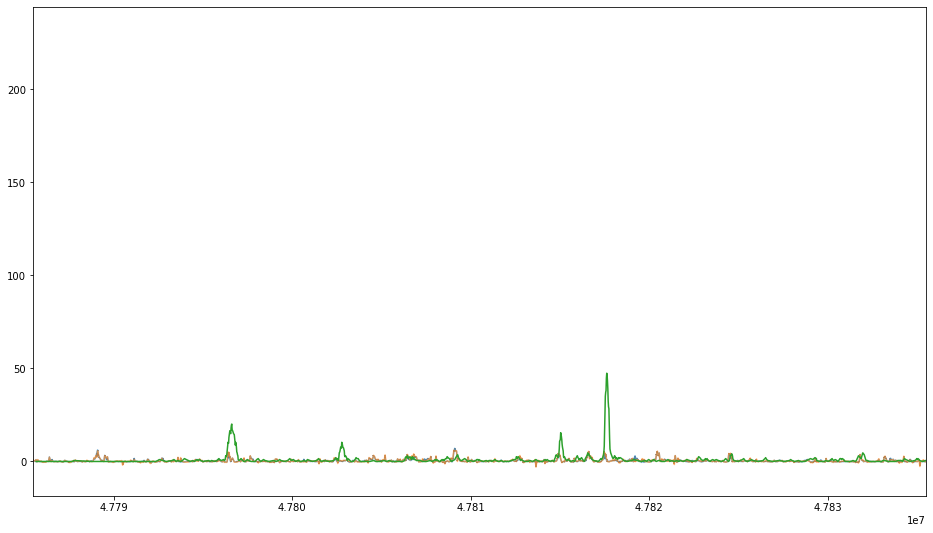

993/54202


In [25]:
fig, ax = plt.subplots(1,1,figsize=(16,9))

START = 47785501
END   = START + 50000

print(f'START: {START}, END: {END}, GAP: {END-START}')

exp_slice = data[ 'project' ] == 'Tiles-GATA'
pos_slice = (data[ 'start' ] >= START) & (data[ 'start' ] < END)

maxes = np.maximum(
    data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ],
    data.loc[ exp_slice & pos_slice, 'K562_mean' ]
)
minis = np.minimum(
    data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ],
    data.loc[ exp_slice & pos_slice, 'K562_mean' ]
)

ax.vlines(
    data.loc[ exp_slice & pos_slice, 'start' ],
    minis, maxes,color='grey'
)

ax.plot(
    data.loc[ exp_slice & pos_slice, 'start' ], 
    data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ],
    alpha=0.6
)

ax.plot(
    data.loc[ exp_slice & pos_slice, 'start' ], 
    data.loc[ exp_slice & pos_slice, 'K562_mean' ],
    alpha=0.6
)

ax.plot(
    dhs['mean_pos'],
    dhs['score']
)

ax.set_xlim(START, END)

draw_genes_from_gff(ax, filtered, promoter_params=[1000,0.2,1000], gene_ylim=[-6.5,-4.0])


plt.show()
print(f"{data.loc[ exp_slice & pos_slice, 'start' ].shape[0]}/{data.loc[ exp_slice, 'start' ].shape[0]}")

In [59]:
np.array(
    [
        [1,2],
        [3,4],
        [5,6]
    ]
).flatten().repeat()

TypeError: 'numpy.ndarray' object is not callable

In [130]:
from scipy import interpolate

def make_this_plot(START, END, file=None):
    fig, ax = plt.subplots(3,1,figsize=(16,12))
    
    dhs_region = (dhs[ 'mean_pos' ] >= START) & (dhs[ 'mean_pos' ] < END)
    exp_slice = data[ 'project' ] == 'Tiles-GATA'
    pos_slice = (data[ 'start' ] >= START) & (data[ 'start' ] < END)
    
    y_spline = interpolate.splrep(
        dhs.loc[dhs_region, 'mean_pos'], 
        dhs.loc[dhs_region, 'score']
    )
    y_spmid = interpolate.splev(data.loc[ exp_slice & pos_slice, 'start' ], y_spline)
    y_spres = np.maximum(0,y_spmid)
    '''
    ax[0].plot(
        dhs.loc[dhs_region, 'mean_pos'],
        dhs.loc[dhs_region, 'score']
    )
    '''
    ax[0].plot(
        data.loc[ exp_slice & pos_slice, 'start' ],
        y_spres,
        color=u'#b49c2a'
    )
    
    dhs_y_max, dhs_y_min = max(dhs.loc[dhs_region, 'score']), min(dhs.loc[dhs_region, 'score'])
    dhs_y_gap = dhs_y_max - dhs_y_min
    ax[0].set_ylim(dhs_y_min-(0.05*dhs_y_gap), dhs_y_max+(0.05*dhs_y_gap))
    
    maxes = np.maximum(
        data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ],
        data.loc[ exp_slice & pos_slice, 'K562_mean' ]
    )
    minis = np.minimum(
        data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ],
        data.loc[ exp_slice & pos_slice, 'K562_mean' ]
    )

    ax[1].plot(
        data.loc[ exp_slice & pos_slice, 'start' ], 
        data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ],
        alpha=1.,color=u'#061c85',
    )

    ax[2].plot(
        data.loc[ exp_slice & pos_slice, 'start' ], 
        data.loc[ exp_slice & pos_slice, 'K562_mean' ],
        alpha=1., color=u'#c43463',
    )
    
    p_corr = pearsonr(
        data.loc[ exp_slice & pos_slice, 'K562_mean' ],
        data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ]
    )
    s_corr = spearmanr(
        data.loc[ exp_slice & pos_slice, 'K562_mean' ],
        data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ]
    )

    p_corr2 = pearsonr(
        y_spmid,
        data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ]
    )
    s_corr2 = spearmanr(
        y_spmid,
        data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ]
    )

    ax[0].set_xlim(START, END)
    ax[1].set_xlim(START, END)
    ax[2].set_xlim(START, END)

    ax[0].xaxis.set_visible(False)
    ax[0].spines['bottom'].set_visible(False)
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)

    ax[1].xaxis.set_visible(False)
    ax[1].spines['bottom'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['top'].set_visible(False)

    ax[2].spines['right'].set_visible(False)
    ax[2].spines['top'].set_visible(False)


    ax[0].set_ylabel('DHS signal', fontsize=16)
    ax[1].set_ylabel('Cerberus Predicted l2fc', fontsize=16)
    ax[2].set_ylabel('MPRA Experimental l2fc', fontsize=16)

    draw_genes_from_gff(ax[2], filtered, promoter_params=[1000,0.2,1000], gene_ylim=[-6.5,-4.0])

    ylims = ax[1].get_ylim()
    ax[1].text(x=START+(0.01*(END-START)), y=ylims[1], s=f'r = {p_corr2[0]:.3f}\nρ = {s_corr2[0]:.3f}', ha='left', fontsize=20)
    ylims = ax[2].get_ylim()
    ax[2].text(x=START+(0.01*(END-START)), y=ylims[1], s=f'r = {p_corr[0]:.3f}\nρ = {s_corr[0]:.3f}', ha='left', fontsize=20)
    
    ax[0].hlines(dhs_y_max+(0.025*dhs_y_gap), END-5000, END, color='black')
    ax[0].text(x=END-2500, y=dhs_y_max, s='5kb', ha='center', fontsize=16)
    
    plt.tight_layout()
    if file is not None:
        plt.savefig(file)
    plt.show()
    print(f"{data.loc[ exp_slice & pos_slice, 'start' ].shape[0]}/{data.loc[ exp_slice, 'start' ].shape[0]}")


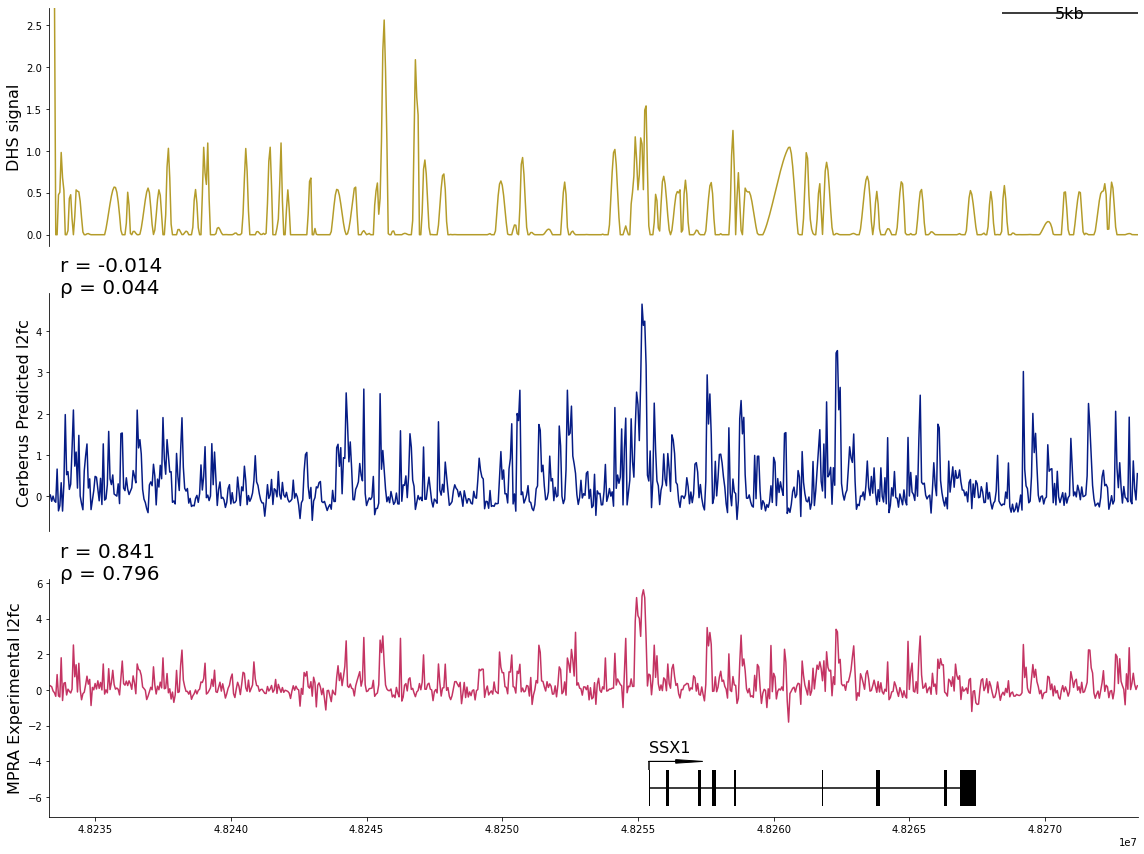

802/54202


In [131]:
make_this_plot(48_233_309,48_273_410)

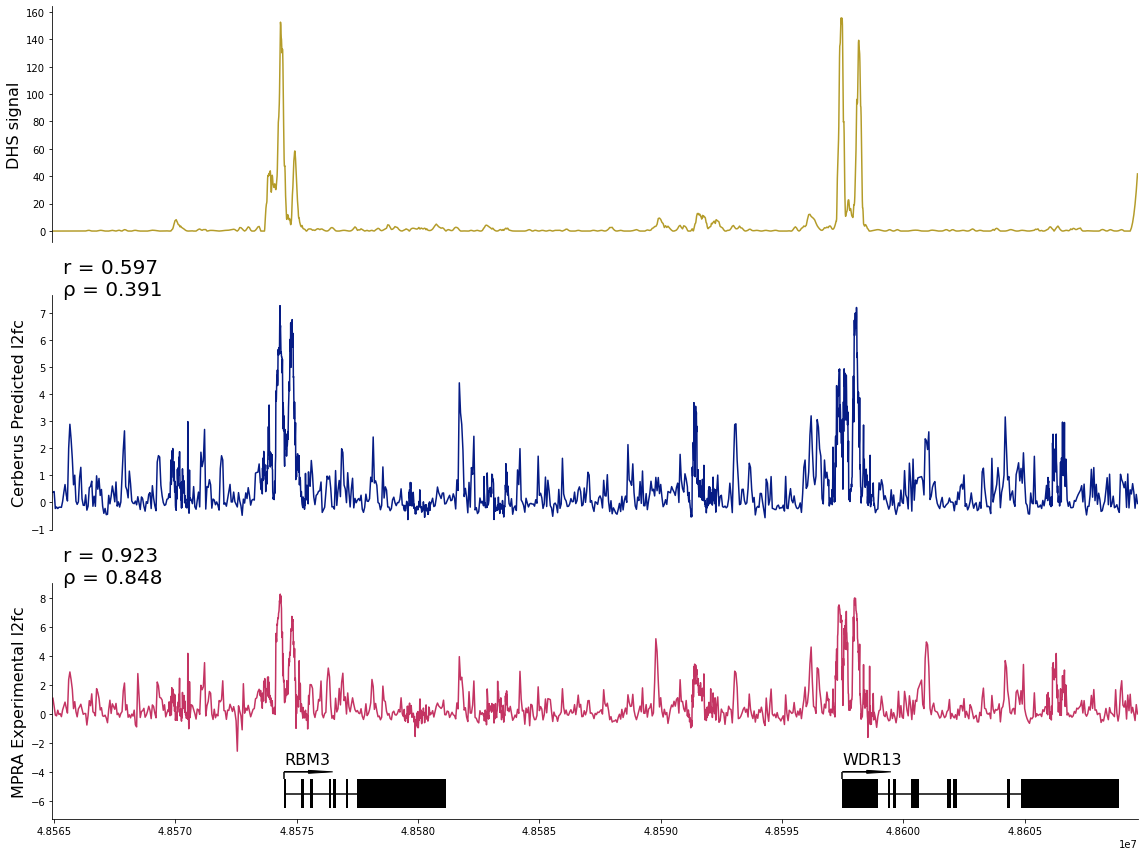

1601/54202


In [116]:
make_this_plot(48_564_927,48_609_656)

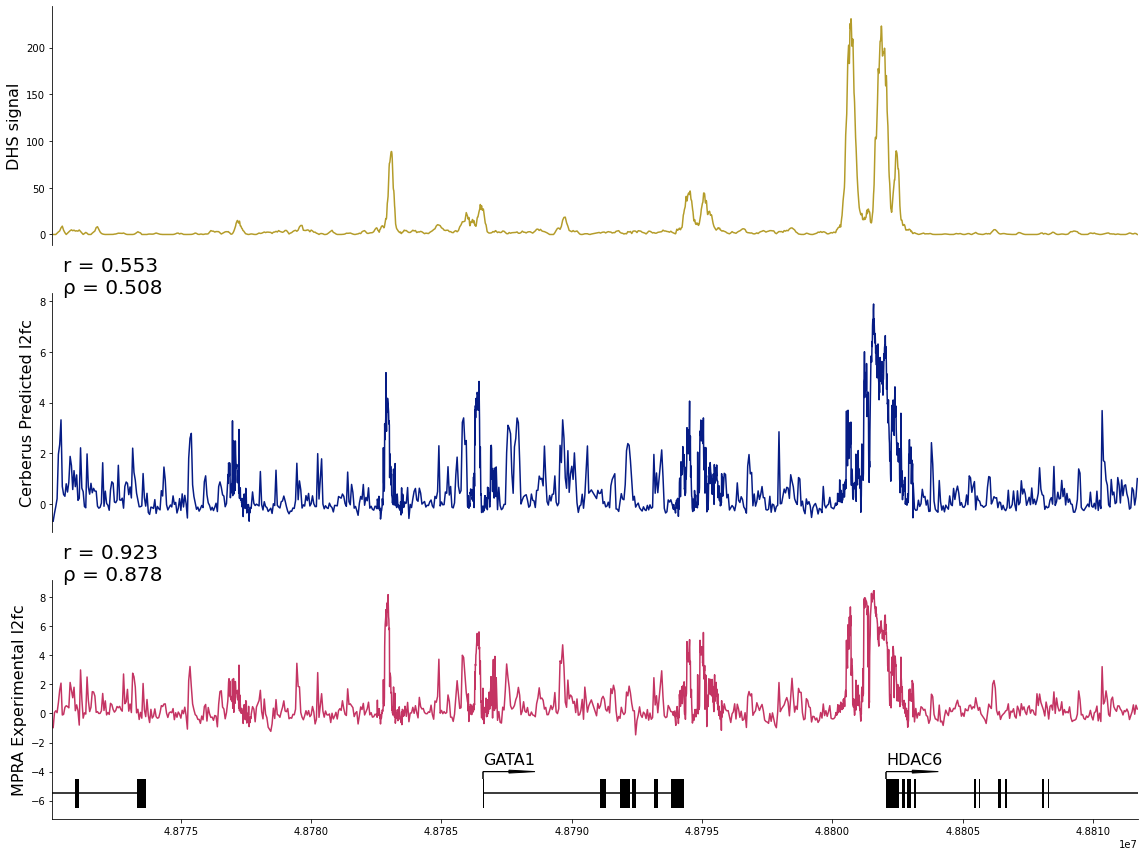

1460/54202


In [122]:
make_this_plot(48_770_068,48_811_712, file="GATA1_locus__Cerberus_preds.pdf")

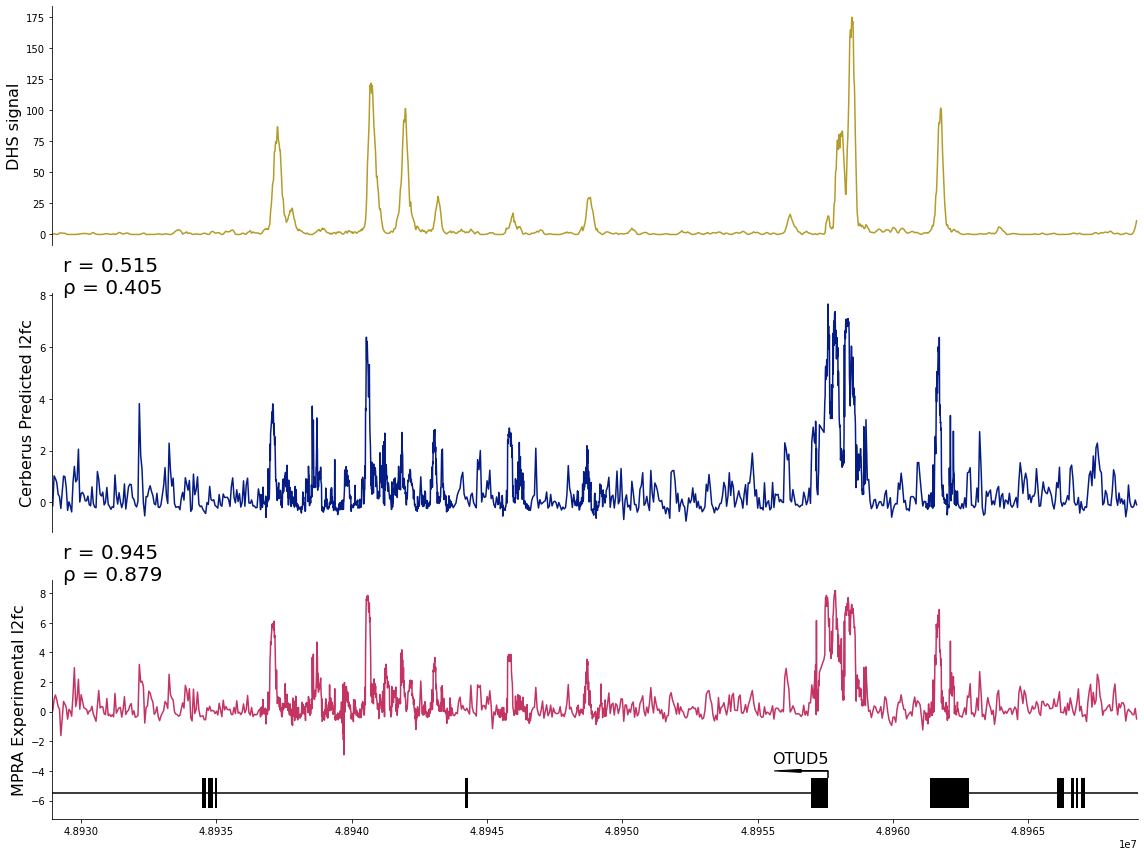

1771/54202


In [118]:
make_this_plot(48_928_936,48_969_038)

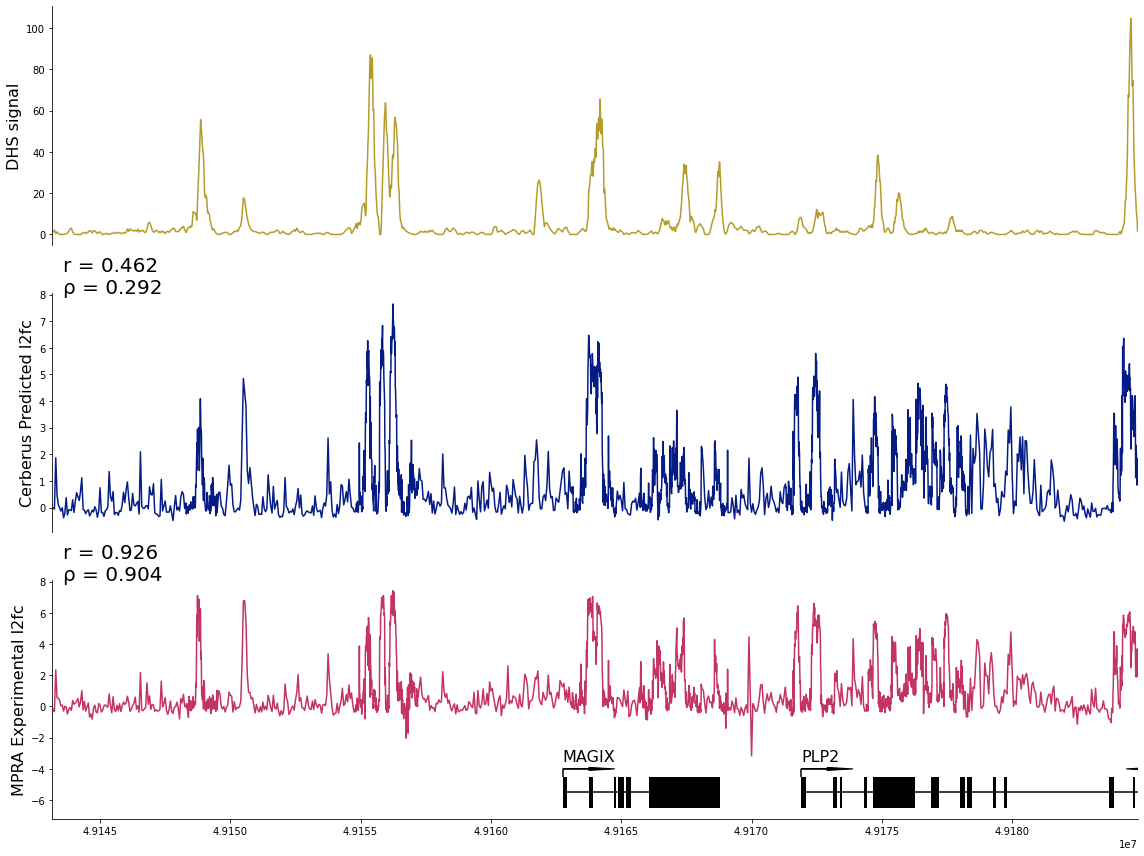

2041/54202


In [119]:
make_this_plot(49_143_170,49_184_814)

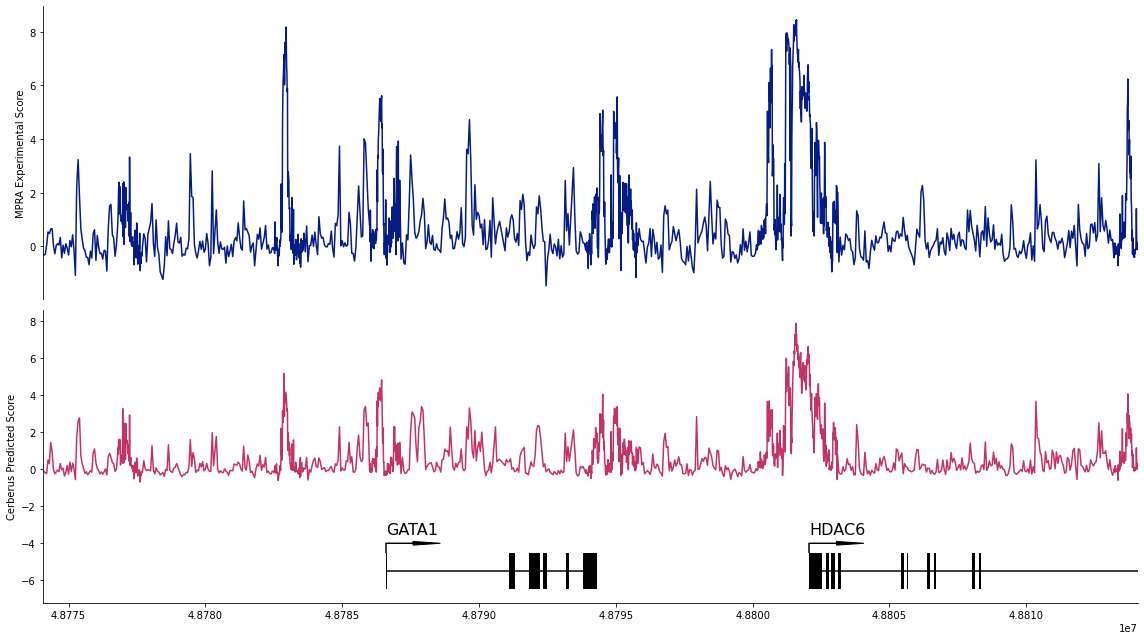

1496/54202


In [145]:
START = 48_774_066
END   = START + 40000

fig, ax = plt.subplots(2,1,figsize=(16,9))

exp_slice = data[ 'project' ] == 'Tiles-GATA'
pos_slice = (data[ 'start' ] >= START) & (data[ 'start' ] < END)

maxes = np.maximum(
    data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ],
    data.loc[ exp_slice & pos_slice, 'K562_mean' ]
)
minis = np.minimum(
    data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ],
    data.loc[ exp_slice & pos_slice, 'K562_mean' ]
)

#ax.vlines(
#    data.loc[ exp_slice & pos_slice, 'start' ],
#    minis, maxes,color='grey'
#)

ax[0].plot(
    data.loc[ exp_slice & pos_slice, 'start' ], 
    data.loc[ exp_slice & pos_slice, 'K562_mean' ],
    alpha=1.,color=u'#061c85',
)

ax[1].plot(
    data.loc[ exp_slice & pos_slice, 'start' ], 
    data.loc[ exp_slice & pos_slice, 'K562_pred_aggreg' ],
    alpha=1., color=u'#c43463',
)

ax[0].set_xlim(START, END)
ax[1].set_xlim(START, END)

ax[0].xaxis.set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)


ax[0].set_ylabel('MPRA Experimental Score')
ax[1].set_ylabel('Cerberus Predicted Score')

draw_genes_from_gff(ax[1], filtered, promoter_params=[1000,0.2,1000], gene_ylim=[-6.5,-4.0])

plt.tight_layout()
plt.show()
print(f"{data.loc[ exp_slice & pos_slice, 'start' ].shape[0]}/{data.loc[ exp_slice, 'start' ].shape[0]}")

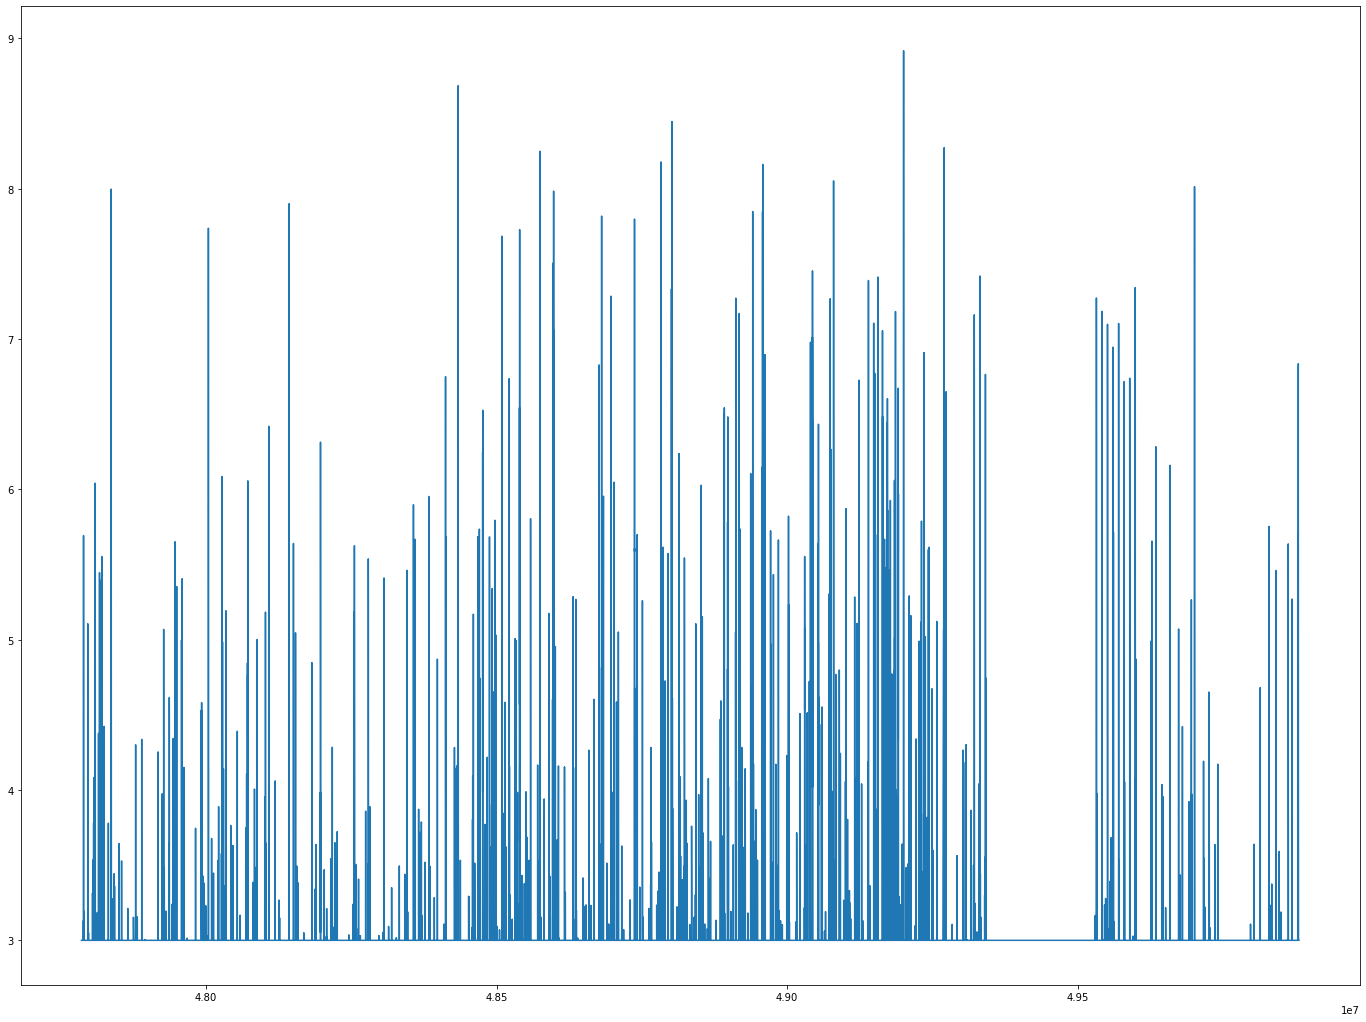

In [112]:
fig = plt.figure(figsize=(24,18))

plt.plot(
    data.loc[ data[ 'project' ] == 'Tiles-GATA', 'start' ], 
    np.clip( data.loc[ data[ 'project' ] == 'Tiles-GATA', 'K562_mean' ], 3, 10 )
)

plt.show()